<h1>HackerEarth Machine Learning Challenge: Carnival Wars! 

Our task is to predict the selling price of the products based on the provided features. 


<b>Import important Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<b> Add Train and Test dataset

In [2]:
df = pd.read_csv('Train.csv')
df.head(5)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [3]:
df_test = pd.read_csv('Test.csv')
df_test.sample(5)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
414,WATE7GP3JZMFEGZG,42.0,2016-03-26 00:48:00.000,175,Alexie,Yes,Educational,2,24,0,110.0,8.0,9121.0,12574
3387,PBXE5CFUTETHWRZH,41.0,2016-01-04 06:15:15.000,358,Airam,Yes,Fashion,3,44,1,352.0,16.0,4369.0,17118
539,BRAEBB6TT8GKVG8A,19.0,2015-08-20 17:48:45.000,450,Kabir,Yes,Child_care,0,42,0,297.0,10.0,1175.0,2618
953,CRTECN2QX4FC2UAC,42.0,2015-09-23 15:18:22.000,3,Jhett,Yes,Cosmetics,0,71,0,263.0,13.0,1827.0,3056
509,BRAE6KWFPZWJ2FHH,17.0,2015-08-19 19:47:19.000,23,Merrick,Yes,Organic,2,50,0,135.0,9.0,651.0,2945


In [4]:
#check if there is any null values

df.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [5]:
#test set

df_test.isnull().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price       14
Maximum_price        0
dtype: int64

In [6]:
#shape of the data 

df.shape

(6368, 15)

## Product_id

In [7]:
#check unique values

df['Product_id'].nunique()

6368

Product_id has all <b>unique values

## Stall_no

In [8]:
#unique values

df['Stall_no'].nunique()

50

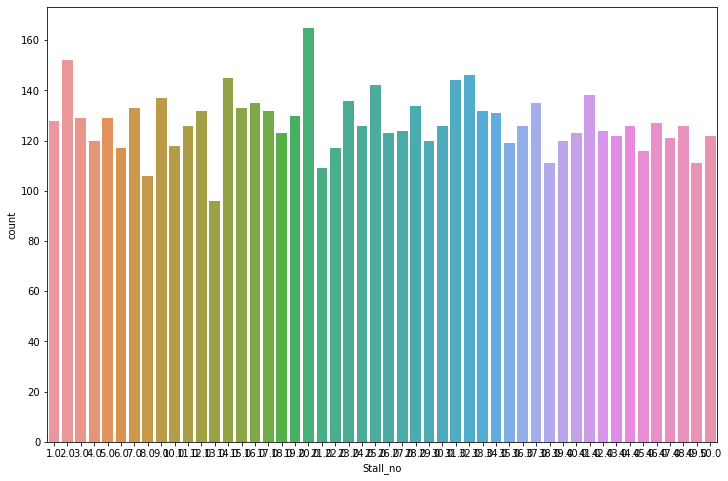

In [9]:
#count plot for Stall_no

plt.figure(figsize=(12,8))
sns.countplot(df['Stall_no'])

## Market_Category

In [10]:
#unique fields in Market_Category

df['Market_Category'].nunique()

248

In [11]:
#count values of each Market_Category

df['Market_Category'].value_counts().sort_values(ascending=False).head(20)

23     326
452    323
358    271
55     249
3      239
58     232
24     218
14     189
447    173
443    152
65     150
451    139
469    116
268    116
57     108
152     85
441     84
93      81
113     76
294     73
Name: Market_Category, dtype: int64

## Product_Category

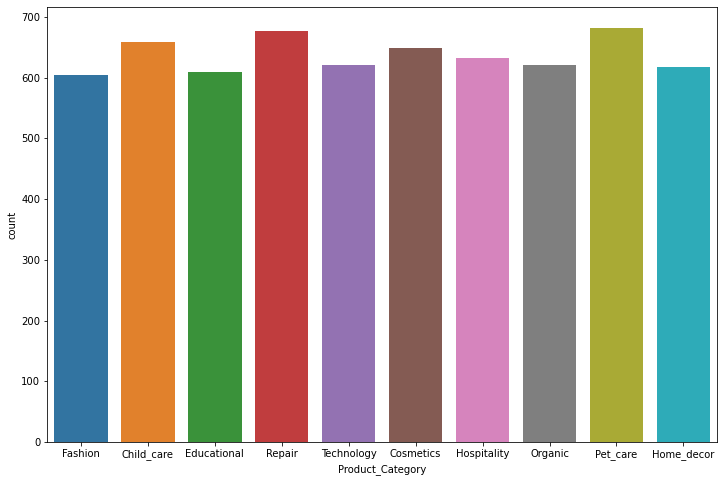

In [12]:
#count plot of Product_Category

plt.figure(figsize=(12,8))
sns.countplot(df['Product_Category'])

## Duplicated Values

In [13]:
#is there any duplicate values

df.duplicated().value_counts()

False    6368
dtype: int64

In [14]:
df_test.duplicated().value_counts()

False    3430
dtype: int64

**No Duplicate**

## Target Variable : Selling_Price

In [15]:
#is Selling_Price contain -ve value

df[df['Selling_Price']<0]

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
50,WSCEFUV4TVWT73ZB,3.0,2014-11-01 09:46:30.000,0,Henry,Yes,Child_care,0,27,0.0,289.0,16.0,2368.0,4231.0,-3584.795550
952,BOTEGYTZ2T6WUJMM,22.0,2014-10-18 23:59:24.000,23,Benjamin,Yes,Pet_care,2,12,0.0,102.0,5.0,1390.0,5665.0,-3630.896874
1000,WATECHFU4QGFQEJG,15.0,2015-01-19 17:23:43.000,437,Audrey,No,Child_care,0,74,0.0,254.0,14.0,3885.0,5485.0,-4896.104400
1115,DREED6FKBQXMDWGM,14.0,2015-05-06 16:21:38.000,55,NaN,Yes,Pet_care,0,77,0.0,169.0,7.0,3829.0,6083.0,-5077.185300
1348,WATEAYZJBFJXB4FZ,44.0,2015-03-01 00:31:35.000,256,Tristan,Yes,Repair,0,22,0.0,285.0,2.0,2873.0,6511.0,-4965.495150
1674,SHOE3URGKNFYXDGP,46.0,2015-05-05 13:19:45.000,283,Steven,Yes,Pet_care,0,57,0.0,135.0,4.0,1975.0,2601.0,-2408.406912
2035,WSCEG2FYDYFDSVZ6,41.0,2014-10-29 12:46:30.000,236,Dylan,Yes,Hospitality,0,10,0.0,255.0,9.0,1320.0,7873.0,-4855.154436
2486,BELEG6KUK6ZBFTZJ,14.0,2014-11-09 20:15:45.000,437,Aubrey,Yes,Child_care,0,19,0.0,331.0,17.0,4044.0,5395.0,-5058.014148
3890,TOPDWSEVWXVQ4GXU,28.0,2015-05-06 14:20:59.000,1,Cesar,Yes,Cosmetics,0,1,0.0,208.0,16.0,2614.0,4891.0,-3966.103350
4188,RNGE7M92QK8FW7ZD,28.0,2015-08-16 23:12:20.000,14,Zaylee,No,Hospitality,0,23,1.0,325.0,9.0,4322.0,NaN,-822.810319


**Contains negative**

In [16]:
#how many -ve value?

df['Selling_Price'][df['Selling_Price']<0].count()

14

**Contains 14 negative values**

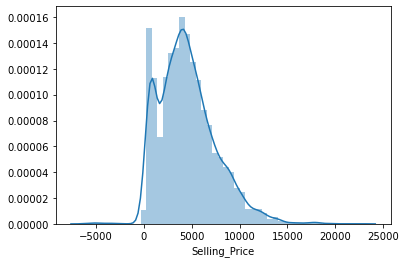

In [17]:
#distribution plot

sns.distplot(df['Selling_Price'])

**Data is right skewed**

In [18]:
df[abs(df['Selling_Price'])<=100]

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
2163,CLTEHE9FKGAZSNXR,5.0,2015-05-05 15:13:23.000,283,Riley,Yes,Educational,0,19,0.0,113.0,13.0,1891.0,5090.0,36.000000
2299,BRAECTFYUXFSVZHE,17.0,2015-08-18 19:08:35.000,23,NaN,Yes,Pet_care,0,76,1.0,130.0,2.0,294.0,593.0,85.178115
3073,BRAEBBYRZVQYHTSE,1.0,2015-08-18 20:21:01.000,54,Sally,Yes,Organic,2,9,1.0,110.0,7.0,387.0,580.0,89.067092
3926,BRAE7YF6YZHQNQND,25.0,2015-08-19 17:36:09.000,62,NaN,Yes,Organic,0,63,1.0,118.0,9.0,245.0,626.0,82.252665
4398,CLTEJ5ZZGWBAZUWR,20.0,2015-05-09 13:21:38.000,447,Johan,Yes,Pet_care,0,76,0.0,197.0,11.0,4052.0,4817.0,-4.000000
5566,ACCEGZ66HG5DH7ZH,28.0,2016-02-22 00:57:42.000,163,Natalynn,No,Organic,0,74,1.0,113.0,9.0,321.0,564.0,82.551150


4398,2163 index delete, absolute value of price

In [28]:
#taking absolute value

df['Selling_Price']=abs(df['Selling_Price'])

<b> Going deeper into relations with Selling_Price

In [29]:
df.groupby('Discount_avail').agg({'Selling_Price':['mean','min','max']})

Selling_Price                         
                        mean        min           max
Discount_avail                                       
0.0              5205.574307   4.000000  22638.325941
1.0               783.191111  82.252665   4724.948025

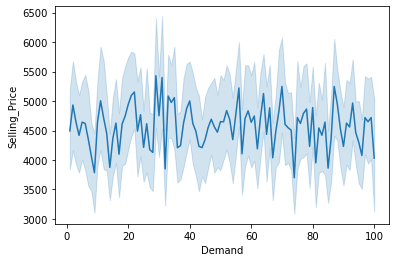

In [30]:
sns.lineplot(x='Demand',y='Selling_Price',data=df)

In [31]:
df.groupby('Grade').agg({'Selling_Price':['mean','min','max']})

Selling_Price                          
               mean         min           max
Grade                                        
0       4420.499553    4.000000  22638.325941
1       5759.772743  125.615383  19398.835456
2       4172.868320   89.067092  17833.893525
3       5964.927400  125.795578  18369.131125

In [32]:
df.groupby(['Product_Category','Grade']).agg({'Selling_Price':['mean','min','max']})

Selling_Price                           
                                mean          min           max
Product_Category Grade                                         
Child_care       0       4513.819839   169.511547  17682.016176
                 1       5449.586514   577.504663  13572.178560
                 2       4165.294139   209.141336  12736.004544
                 3       5913.457033   664.778016  15740.735769
Cosmetics        0       4407.088860   154.798829  16859.633868
                 1       6185.676424   698.640129  16681.624960
                 2       3816.868162   284.320627  12388.612500
                 3       6087.803240   241.296165  14068.208000
Educational      0       4113.862055    36.000000  13636.283850
                 1       4926.247117   564.285566  12653.093376
                 2       4303.472117   290.205485  17833.893525
                 3       5321.397593   142.546327  12157.898368
Fashion          0       4731.041569   180.752141  21152.191500
                 1       5971.008730   769.014893  10654.254468
                 2       4415.216335   437.254541  17044.275600
                 3       6430.880284   180.158982  11918.778003
Home_decor       0       4457.069575   220.707374  22638.325941
                 1       6432.830408   458.717332  18363.905175
                 2       4027.852065   351.809865  12861.186450
                 3       5571.183766   539.684992  18126.165312
Hospitality      0       4220.831001   131.211835  14780.605875
                 1       6490.428040   918.983621  17798.913216
                 2       4112.870414   343.133683  13967.992500
                 3       6285.564654   125.795578  18369.131125
Organic          0       4175.487445    82.252665  14201.076736
                 1       4817.511229  1199.161572  13304.095200
                 2       4094.165021    89.067092  11601.569727
                 3       5832.353420   147.613687  14330.045100
Pet_care         0       4464.670928     4.000000  17400.526375
                 1       5503.999621   792.670725  10786.640832
                 2       4379.197445   306.095625  15685.883850
                 3       5554.919501   174.482246  17881.346560
Repair           0       4380.962106   227.947500  13804.611408
                 1       6176.258422   125.615383  19398.835456
                 2       4105.552288   386.731699  13953.094551
                 3       6388.647654   588.584700  14319.481575
Technology       0       4706.230570   188.769892  19586.969850
                 1       5741.765285   361.387488  17569.579500
                 2       4336.054204   370.008495  13835.466575
                 3       6435.141454   152.645929  18017.168103